todo:
feature engineering ideas? use stuff that I dropped?

improve hyperparameter tuning

gather more data

new models to try out


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import lightgbm as ltb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from skopt import BayesSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cnndf = pd.read_csv("/content/drive/MyDrive/Real Estate/df_with_predictions(loss = 0.2630).csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Real Estate/realEstateCombinedData.csv") #remember to download data and mount it to google drive

In [ ]:
df.sort_values(by = "n_citi")

,image_id,street,citi,n_citi,bed,bath,sqft,price,std_from_mean,predicted_std_from_mean
8485,8485,73833 White Sands Drive,"29 Palms, CA",0,3,2.0,1518,225000,-1.268306,-0.406040
8397,8397,72912 Manana Drive,"29 Palms, CA",0,3,2.0,1280,220000,-1.281569,-0.267824
8333,8333,71598 Sunflower Drive,"29 Palms, CA",0,4,2.0,1604,208000,-1.313401,0.176072
8534,8534,4838 Sunmore,"29 Palms, CA",0,3,2.0,1694,279000,-1.125060,1.105903
8456,8456,5229 Verenda Avenue,"29 Palms, CA",0,3,2.0,1618,215000,-1.294832,-0.243400
...,...,...,...,...,...,...,...,...,...,...
8442,8442,5111 Linda Lee Drive,"Yucca Valley, CA",414,2,1.0,926,210000,-1.308096,-0.314879
9051,9051,7545 PINON Drive,"Yucca Valley, CA",414,4,2.0,2161,379000,-0.859792,0.036334
8670,8670,7562 Valley Vista Avenue,"Yucca Valley, CA",414,3,2.0,1368,245900,-1.212864,0.276548
8967,8967,6404 Airway Avenue,"Yucca Valley, CA",414,4,2.0,2313,399000,-0.806738,0.056939


In [ ]:
df.drop(inplace = True, columns = "citi")

In [ ]:
len(df)

15474

In [ ]:
df.drop(columns = "std_from_mean", inplace = True)

In [ ]:
df

,image_id,street,n_citi,bed,bath,sqft,price,predicted_std_from_mean
0,0,1317 Van Buren Avenue,317,3,2.0,1560,201900,-1.472661
1,1,124 C Street W,48,3,2.0,713,228500,-0.574631
2,2,2304 Clark Road,152,3,1.0,800,273950,-0.421288
3,3,755 Brawley Avenue,48,3,1.0,1082,350000,-0.731896
4,4,2207 R Carrillo Court,55,4,3.0,2547,385100,-0.621437
...,...,...,...,...,...,...,...,...
15469,15469,4156 Sterlingview Drive,227,5,4.1,4092,949000,-0.312242
15470,15470,4355 Avenida Prado,372,5,3.0,2773,949900,-0.372756
15471,15471,12717 Koenigstein Rd Road,338,3,2.0,1576,920000,0.287374
15472,15472,36 Kunkle Street,253,4,2.0,2086,997000,0.775862


<ipython-input-12-8f51bcbe91d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot = True) #heatmap to find correlation between features and target


<Axes: >

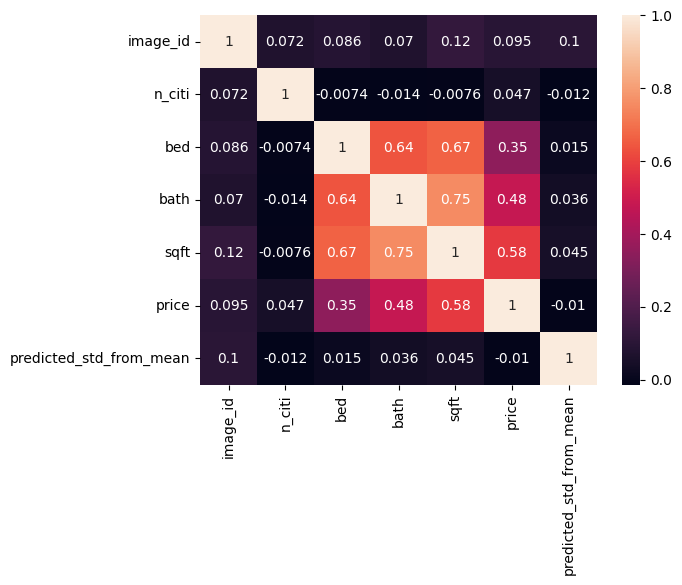

In [ ]:
sns.heatmap(data=df.corr(),annot = True) #heatmap to find correlation between features and target

<ipython-input-13-49f9e2fb7e7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


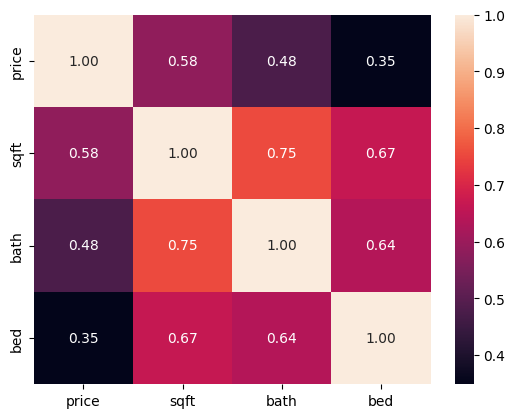

In [ ]:
corrmat = df.corr()
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index #selects k variables with highest corr with price and returns the index labels of the variables
cm = np.corrcoef(df[cols].values.T) #gets correlation coefficients of the variables (.values.T turns df[cols] into a transposed array which is the input for np.corrcoef)
sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values) #heatmap
plt.show()

In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features'] #show most correlated features with price
most_corr

,Most Correlated Features
0,price
1,sqft
2,bath
3,bed


In [ ]:
df.isnull().sum() #check for missing values

image_id                   0
street                     0
n_citi                     0
bed                        0
bath                       0
sqft                       0
price                      0
predicted_std_from_mean    0
dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder #kinda useless cuz i end up dropping street anyway
# le = LabelEncoder() #label encoder can be used to transform non numerical values into numerical values

# transformcols = ["street"]
# df.info()
# for col in transformcols:
#     df[col] = le.fit_transform(df[col]) #fit and transform data
#     print(le.classes_)

In [ ]:
df.sort_values(by = "street")

,image_id,street,n_citi,bed,bath,sqft,price,predicted_std_from_mean
15023,15023,0 H Street,261,3,2.1,1653,575000,2.322474
18,18,0 Oak Creek rd,367,4,1.1,1980,1995000,-0.609120
11768,11768,0000 Roadrunner Ridge,384,2,1.0,1045,460000,-0.306655
3263,3263,1 Anapamu Street,177,4,4.1,3700,1595000,0.263639
3055,3055,1 Flintridge Avenue,177,6,4.0,3100,1075000,-0.951805
...,...,...,...,...,...,...,...,...
12567,12567,Address not provided,80,4,2.1,1937,678900,2.421290
14886,14886,Address not provided,261,3,2.0,1704,550000,-0.667458
11964,11964,Address not provided,356,3,2.0,1415,519999,-0.263721
5197,5197,Residence Club Cove,175,3,3.1,3567,1600000,0.045243


In [ ]:
#df["street"].corr(df["price"]) #street correlation with price

In [ ]:
df.drop(columns = "street",inplace=True) #drop street because doesn't seem to have high correlation with price anyway

In [ ]:
mean_price = df["price"].mean()
print(mean_price)

703120.9375080781


In [ ]:
std_price = df["price"].std()

#df["std_dev_from_mean"] = (df["price"] - mean_price) / std_price

In [ ]:
mean_price

703120.9375080781

In [ ]:
df

,image_id,n_citi,bed,bath,sqft,price,predicted_std_from_mean
0,0,317,3,2.0,1560,201900,-1.472661
1,1,48,3,2.0,713,228500,-0.574631
2,2,152,3,1.0,800,273950,-0.421288
3,3,48,3,1.0,1082,350000,-0.731896
4,4,55,4,3.0,2547,385100,-0.621437
...,...,...,...,...,...,...,...
15469,15469,227,5,4.1,4092,949000,-0.312242
15470,15470,372,5,3.0,2773,949900,-0.372756
15471,15471,338,3,2.0,1576,920000,0.287374
15472,15472,253,4,2.0,2086,997000,0.775862


In [ ]:
X = df.drop(columns = "price")
y = df["price"]

<ipython-input-25-aa0b57ab91d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,fit=norm); #data without log transform applied (very skewed)


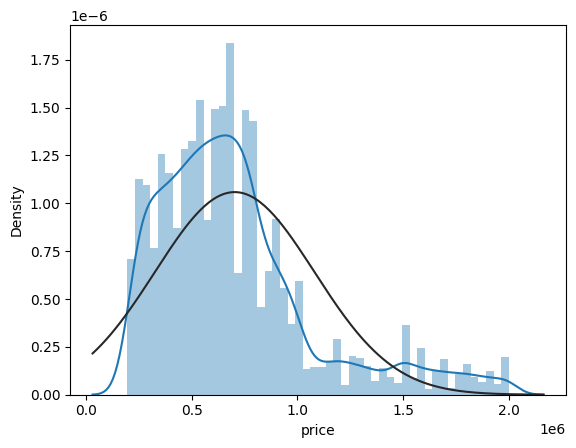

In [ ]:
sns.distplot(y,fit=norm); #data without log transform applied (very skewed)

<ipython-input-26-c71c0625c818>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y , fit=norm);


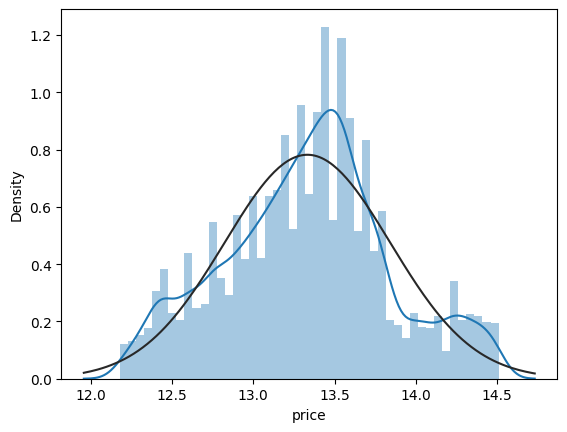

In [ ]:
y = np.log1p(y) #takes natural log of y+1 basically just transforms skewed data
sns.distplot(y , fit=norm);

In [ ]:
df

,image_id,n_citi,bed,bath,sqft,price,predicted_std_from_mean
0,0,317,3,2.0,1560,201900,-1.472661
1,1,48,3,2.0,713,228500,-0.574631
2,2,152,3,1.0,800,273950,-0.421288
3,3,48,3,1.0,1082,350000,-0.731896
4,4,55,4,3.0,2547,385100,-0.621437
...,...,...,...,...,...,...,...
15469,15469,227,5,4.1,4092,949000,-0.312242
15470,15470,372,5,3.0,2773,949900,-0.372756
15471,15471,338,3,2.0,1576,920000,0.287374
15472,15472,253,4,2.0,2086,997000,0.775862


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size = 0.5)


In [ ]:
y_test

8321     12.429220
11716    13.112315
5559     12.464587
6348     13.038984
2747     13.697854
           ...    
5887     12.765406
7264     13.422469
9586     13.217675
1170     12.807655
4654     13.592367
Name: price, Length: 2322, dtype: float64

In [ ]:
len(X_train)

10831

In [ ]:
len(y_train)

10831

In [ ]:
len(X_val)

2321

In [ ]:
len(y_val)

2321

In [ ]:
len(X_test)

2322

In [ ]:
len(y_test)

2322

In [ ]:
y_test

8321     12.429220
11716    13.112315
5559     12.464587
6348     13.038984
2747     13.697854
           ...    
5887     12.765406
7264     13.422469
9586     13.217675
1170     12.807655
4654     13.592367
Name: price, Length: 2322, dtype: float64

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[-1.46294857,  0.44866091, -0.49302484, -0.47273377, -0.56603403,
        -0.66336384],
       [ 0.5374317 ,  0.77709005,  1.45835541,  0.66736408,  1.08589735,
         1.60074536],
       [ 0.73832171,  0.91911346,  0.48266528, -0.36908851,  0.67993885,
        -0.10142897],
       ...,
       [ 0.18946149,  0.90136053, -1.46871497, -1.50918636, -1.19095822,
        -0.12338624],
       [-0.74077587,  0.26225519,  0.48266528,  0.56371882,  0.14221338,
         0.09532271],
       [-0.79503411, -0.60763819, -0.49302484, -0.47273377, -0.86638519,
         2.48838012]])

In [ ]:
X_test

array([[ 0.12959806, -0.65202051, -0.49302484, -0.47273377, -0.84894545,
        -0.42467172],
       [ 0.89078289,  0.52854908, -0.49302484, -0.47273377, -0.50693267,
        -0.29240291],
       [-0.48966335, -1.02483196, -0.49302484, -0.47273377, -0.66001488,
         2.5052989 ],
       ...,
       [ 0.41322068, -0.86505562,  2.43404554,  1.60017141,  1.45988299,
        -0.2996385 ],
       [-1.47371053, -0.20819736,  0.48266528,  0.56371882, -0.41585845,
        -0.62385598],
       [-0.69257123,  0.37764921, -0.49302484, -0.47273377, -0.3373796 ,
        -0.59003341]])

In [ ]:
X_val

,image_id,n_citi,bed,bath,sqft,predicted_std_from_mean
13713,13713,21,3,3.0,1832,-0.513874
14714,14714,372,5,4.0,3789,2.945127
2149,2149,330,3,1.1,1208,0.373723
6156,6156,185,4,3.0,2595,0.950576
6778,6778,141,6,4.0,3610,1.413639
...,...,...,...,...,...,...
11187,11187,294,3,2.0,1920,1.610984
5259,5259,87,5,5.1,5955,0.518551
12322,12322,320,2,1.0,997,1.524582
5613,5613,154,2,2.0,1432,2.187195


In [ ]:
y_val

13713    13.120363
14714    14.220309
2149     13.351888
6156     13.005832
6778     13.217494
           ...    
11187    12.428820
5259     14.315680
12322    13.337476
5613     12.608202
9297     13.027835
Name: price, Length: 2321, dtype: float64

In [ ]:
y_train

1218     12.803257
10140    13.458823
11036    14.496079
13000    13.591117
15454    13.704580
           ...    
13323    13.814511
6341     13.028055
8588     12.594731
4439     13.560620
4197     13.527830
Name: price, Length: 10831, dtype: float64

In [ ]:
y_test

8321     12.429220
11716    13.112315
5559     12.464587
6348     13.038984
2747     13.697854
           ...    
5887     12.765406
7264     13.422469
9586     13.217675
1170     12.807655
4654     13.592367
Name: price, Length: 2322, dtype: float64

In [ ]:
reg = ltb.LGBMRegressor(random_state=15)
reg1 =XGBRegressor(random_state=15)
reg2 = RandomForestRegressor(random_state = 15)

In [ ]:
search_space = {
    "num_leaves":[32,40],
    "min_child_samples":[15,25]
}
search_space1 = {
    "max_depth":[1,9],
    "min_child_weight":[1,5],
    "eta":[0.1,0.5],
    "gamma":[0,5]
}
search_space2 = {
    "min_samples_leaf":[1,10],
    "min_samples_split":[2,7],
    "n_estimators":[40,50]

}


In [ ]:
bayeslgbm = BayesSearchCV(reg,search_spaces = search_space,n_iter = 20,verbose = 3)
bayeslgbm.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_child_samples=19, num_leaves=32;, score=0.925 total time=   0.2s
[CV 2/5] END min_child_samples=19, num_leaves=32;, score=0.952 total time=   0.1s
[CV 3/5] END min_child_samples=19, num_leaves=32;, score=0.948 total time=   0.1s
[CV 4/5] END min_child_samples=19, num_leaves=32;, score=0.941 total time=   0.1s
[CV 5/5] END min_child_samples=19, num_leaves=32;, score=0.942 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_child_samples=18, num_leaves=35;, score=0.930 total time=   0.2s
[CV 2/5] END min_child_samples=18, num_leaves=35;, score=0.953 total time=   0.2s
[CV 3/5] END min_child_samples=18, num_leaves=35;, score=0.948 total time=   0.1s
[CV 4/5] END min_child_samples=18, num_leaves=35;, score=0.942 total time=   0.1s
[CV 5/5] END min_child_samples=18, num_leaves=35;, score=0.942 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_child_samples=15, num_leaves=37;, score=0.932 total time=   0.2s
[CV 2/5] END min_child_samples=15, num_leaves=37;, score=0.953 total time=   0.1s
[CV 3/5] END min_child_samples=15, num_leaves=37;, score=0.950 total time=   0.1s
[CV 4/5] END min_child_samples=15, num_leaves=37;, score=0.943 total time=   0.1s
[CV 5/5] END min_child_samples=15, num_leaves=37;, score=0.944 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_child_samples=15, num_leaves=37;, score=0.932 total time=   0.2s
[CV 2/5] END min_child_samples=15, num_leaves=37;, score=0.953 total time=   0.1s
[CV 3/5] END min_child_samples=15, num_leaves=37;, score=0.950 total time=   0.1s
[CV 4/5] END min_child_samples=15, num_leaves=37;, score=0.943 total time=   0.2s
[CV 5/5] END min_child_samples=15, num_leaves=37;, score=0.944 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_child_samples=25, num_leaves=35;, score=0.925 total time=   0.2s
[CV 2/5] END min_child_samples=25, num_leaves=35;, score=0.951 total time=   0.1s
[CV 3/5] END min_child_samples=25, num_leaves=35;, score=0.947 total time=   0.1s
[CV 4/5] END min_child_samples=25, num_leaves=35;, score=0.942 total time=   0.1s
[CV 5/5] END min_child_samples=25, num_leaves=35;, score=0.942 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV

BayesSearchCV(estimator=LGBMRegressor(random_state=15), n_iter=20,
              search_spaces={'min_child_samples': [15, 25],
                             'num_leaves': [32, 40]},
              verbose=3)

In [ ]:
bayesxgb = BayesSearchCV(reg1,search_spaces = search_space1, n_iter = 20,verbose = 3)
bayesxgb.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END eta=0.4872822933198301, gamma=5, max_depth=7, min_child_weight=2;, score=0.830 total time=   1.0s
[CV 2/5] END eta=0.4872822933198301, gamma=5, max_depth=7, min_child_weight=2;, score=0.887 total time=   0.9s
[CV 3/5] END eta=0.4872822933198301, gamma=5, max_depth=7, min_child_weight=2;, score=0.894 total time=   0.8s
[CV 4/5] END eta=0.4872822933198301, gamma=5, max_depth=7, min_child_weight=2;, score=0.872 total time=   0.9s
[CV 5/5] END eta=0.4872822933198301, gamma=5, max_depth=7, min_child_weight=2;, score=0.837 total time=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END eta=0.20745909517239314, gamma=4, max_depth=3, min_child_weight=3;, score=0.806 total time=   0.3s
[CV 2/5] END eta=0.20745909517239314, gamma=4, max_depth=3, min_child_weight=3;, score=0.825 total time=   0.3s
[CV 3/5] END eta=0.20745909517239314, gamma=4, max_depth=3, min_child_weight=3;, score=0.804 total time

BayesSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=15, ...),
              n_iter=20,
              search_spaces={'eta': [0.1, 0.5], 'gamma': [0, 5],
                             'max_depth': [1, 9], 'min_child_weight': [1, 5]},
              verbose=3)

In [ ]:
bayesrf = BayesSearchCV(reg2,search_spaces = search_space2,verbose=3) #perform bayes search on rf model to find best hyperparameters
bayesrf.fit(X_train,y_train) #fit to train data

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.938 total time=   1.1s
[CV 2/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.962 total time=   1.0s
[CV 3/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.964 total time=   1.0s
[CV 4/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.951 total time=   1.0s
[CV 5/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.946 total time=   1.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=0.938 total time=   1.2s
[CV 2/5] END min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=0.962 total time=   1.5s
[CV 3/5] END min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=0.964 total time=   1.6s
[CV 4/5] END min_samples_leaf=9, min_samples_split=5, n_es

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.9s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.5s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.975 total time=   1.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.968 total time=   1.1s
[CV 4/5] END min_samples_leaf=1, min_samples_split=3, n_es

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.5s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.9s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=3, min_samples_split=5, n_estimators=43;, score=0.946 total time=   1.1s
[CV 2/5] END min_samples_leaf=3, min_samples_split=5, n_estimators=43;, score=0.974 total time=   1.0s
[CV 3/5] END min_samples_leaf=3, min_samples_split=5, n_estimators=43;, score=0.968 total time=   1.0s
[CV 4/5] END min_samples_leaf=3, min_samples_split=5, n_es

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.3s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.9s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.3s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=5, min_samples_split=3, n_estimators=49;, score=0.944 total time=   1.1s
[CV 2/5] END min_samples_leaf=5, min_samples_split=3, n_estimators=49;, score=0.970 total time=   1.3s
[CV 3/5] END min_samples_leaf=5, min_samples_split=3, n_estimators=49;, score=0.967 total time=   1.6s
[CV 4/5] END min_samples_leaf=5, min_samples_split=3, n_es

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.7s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.9s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.4s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=9, min_samples_split=3, n_estimators=45;, score=0.938 total time=   1.3s
[CV 2/5] END min_samples_leaf=9, min_samples_split=3, n_estimators=45;, score=0.962 total time=   0.9s
[CV 3/5] END min_samples_leaf=9, min_samples_split=3, n_estimators=45;, score=0.964 total time=   0.9s
[CV 4/5] END min_samples_leaf=9, min_samples_split=3, n_es

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=3, min_samples_split=5, n_estimators=47;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=3, min_samples_split=5, n_estimators=47;, score=0.974 total time=   1.1s
[CV 3/5] END min_samples_leaf=3, min_samples_split=5, n_estimators=47;, score=0.968 total time=   1.1s
[CV 4/5] END min_samples_leaf=3, min_samples_split=5, n_es

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=41;, score=0.938 total time=   0.8s
[CV 2/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=41;, score=0.962 total time=   0.9s
[CV 3/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=41;, score=0.963 total time=   1.3s
[CV 4/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=41;, score=0.951 total time=   1.3s
[CV 5/5] END min_samples_leaf=9, min_samples_split=6, n_estimators=41;, score=0.947 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.946 total time=   1.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.976 total time=   1.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.968 total time=   1.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.959 total time=   1.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.957 total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_leaf=4, min_samples_split=3, n_estimators=47;, score=0.945 total time=   1.1s
[CV 2/5] END min_samples_leaf=4, min_samples_split=3, n_estimators=47;, score=0.972 total time=   1.6s
[CV 3/5] END min_samples_leaf=4, min_samples_split=3, n_estimators=47;, score=0.968 total time=   1.7s
[CV 4/5] END min_samples_leaf=4, min_samples_split=3, n_es

BayesSearchCV(estimator=RandomForestRegressor(random_state=15),
              search_spaces={'min_samples_leaf': [1, 10],
                             'min_samples_split': [2, 7],
                             'n_estimators': [40, 50]},
              verbose=3)

In [ ]:
bestreg = bayeslgbm.best_estimator_ #get best estimator from bayessearch

bestreg1 = bayesxgb.best_estimator_

bestreg2 = bayesrf.best_estimator_


In [ ]:
bestreg

LGBMRegressor(min_child_samples=15, num_leaves=37, random_state=15)

In [ ]:
bestreg1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
bestreg2

RandomForestRegressor(n_estimators=40, random_state=15)

In [ ]:
estimators = [("lgbm",bestreg),("xgb",bestreg1),("rf",bestreg2)] #estimators used in stackingregressor

In [ ]:
stackedmodels = StackingRegressor(estimators = estimators, final_estimator = bestreg1) #stacking
stackedmodels.fit(X_train,y_train)

In [ ]:
final_preds = stackedmodels.predict(X_test)
stackedscore =r2_score(y_test, final_preds)
print('R2 score stacked xgb: ', stackedscore) #calculate r2 score for stackingregressor
#0.953583 with xgb as final estimator
#0.973125 while normalizing the distribution so less skew in data

In [ ]:
mse = mean_squared_error(y_test, final_preds)

print("Mean Squared Error:", mse)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, final_preds))

print("Root Mean Squared Error:", rmse)

In [ ]:
test_preds = bayeslgbm.predict(X_test)
test_preds

In [ ]:
test_preds1 = bayesxgb.predict(X_test)
test_preds1

In [ ]:
test_preds2 = bayesrf.predict(X_test)
test_preds2

array([12.38005126, 13.08914759, 12.52834046, ..., 13.1779149 ,
       12.80845787, 13.63956501])

In [ ]:
lgbmscore = r2_score(y_test, test_preds) #calculate r2 score for lgbm model
print('R2 score lgbm: ',lgbmscore)
#0.914178 without hyperparameters
#0.945087 with normalization applied to skewed data + hyperparams

R2 score lgbm:  0.9523287593649667


In [ ]:
xgbscore =r2_score(y_test, test_preds1) #calculate r2 score for xgb model
print('R2 score xgb: ', xgbscore)
#0.9447651941 without hyperparameters
#0.970013664 with normalization applied to skewed data + hyperparams

R2 score xgb:  0.9692889600083557


In [ ]:
rfscore =r2_score(y_test, test_preds2) #calculate r2 score for rf model
print('R2 score rf: ', rfscore)
#0.9416806 without hyperparams
#0.966731935 with normalization applied to skewed data + hyperparams

R2 score rf:  0.9601228431022424


In [ ]:
y_test = np.expm1(y_test)

In [ ]:
y_test

8321     250000.0
11716    495000.0
5559     259000.0
6348     460000.0
2747     889000.0
           ...   
5887     349900.0
7264     675000.0
9586     550000.0
1170     365000.0
4654     799999.0
Name: price, Length: 2322, dtype: float64

In [ ]:
final_preds = np.expm1(final_preds)

In [ ]:
final_preds

array([228688.9 , 479204.38, 269674.94, ..., 532682.8 , 370879.47,
       829756.  ], dtype=float32)

In [ ]:
mse = mean_squared_error(y_test, final_preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 7046817536.044087


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 83945.32468246274


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,final_preds)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 38700.63594826656


In [ ]:
stackedscore =r2_score(y_test, final_preds)
print('R2 score stacked xgb: ', stackedscore)

R2 score stacked xgb:  0.9520410193227871


In [ ]:
y_test

8321     250000.0
11716    495000.0
5559     259000.0
6348     460000.0
2747     889000.0
           ...   
5887     349900.0
7264     675000.0
9586     550000.0
1170     365000.0
4654     799999.0
Name: price, Length: 2322, dtype: float64

In [ ]:
final_preds

array([228688.9 , 479204.38, 269674.94, ..., 532682.8 , 370879.47,
       829756.  ], dtype=float32)

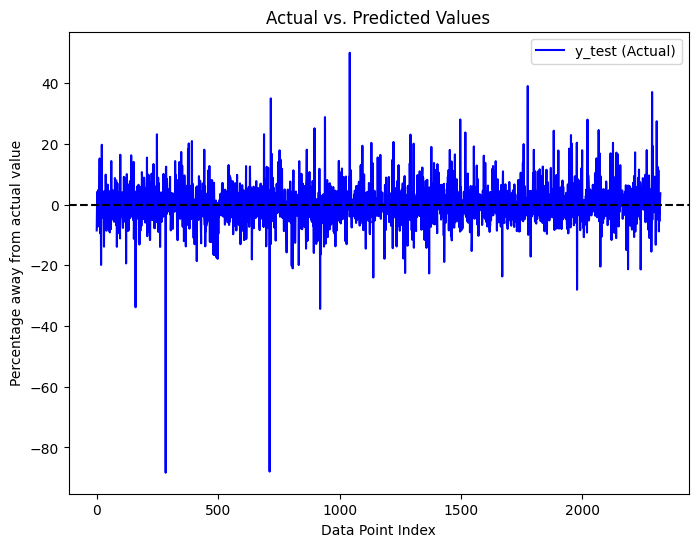

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_preds and y_test are 1D numpy arrays or Python lists
# Calculate the differences between final_preds and y_test
differences = (final_preds - y_test)/y_test

# Create a scatter plot for y_test (actual values)
plt.figure(figsize=(8, 6))
sns.lineplot(x= range(len(y_test)), y = differences*100, color='blue', label='y_test (Actual)')
#sns.lineplot(x = range(len(final_preds)), y = final_preds, color='red', label='final_preds (Predicted)')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Data Point Index')
plt.ylabel('Percentage away from actual value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
X_test

array([[ 0.12959806, -0.65202051, -0.49302484, -0.47273377, -0.84894545,
        -0.42467172],
       [ 0.89078289,  0.52854908, -0.49302484, -0.47273377, -0.50693267,
        -0.29240291],
       [-0.48966335, -1.02483196, -0.49302484, -0.47273377, -0.66001488,
         2.5052989 ],
       ...,
       [ 0.41322068, -0.86505562,  2.43404554,  1.60017141,  1.45988299,
        -0.2996385 ],
       [-1.47371053, -0.20819736,  0.48266528,  0.56371882, -0.41585845,
        -0.62385598],
       [-0.69257123,  0.37764921, -0.49302484, -0.47273377, -0.3373796 ,
        -0.59003341]])

In [ ]:
final_preds

array([228688.9 , 479204.38, 269674.94, ..., 532682.8 , 370879.47,
       829756.  ], dtype=float32)

In [ ]:
X_test = scaler.inverse_transform(X_test)
X_test

array([[ 8.3210000e+03,  1.4300000e+02,  3.0000000e+00,  2.0000000e+00,
         1.3000000e+03, -1.6022170e-01],
       [ 1.1716000e+04,  2.7600000e+02,  3.0000000e+00,  2.0000000e+00,
         1.6530000e+03, -4.7480933e-02],
       [ 5.5590000e+03,  1.0100000e+02,  3.0000000e+00,  2.0000000e+00,
         1.4950000e+03,  2.3371708e+00],
       ...,
       [ 9.5860000e+03,  1.1900000e+02,  6.0000000e+00,  4.0000000e+00,
         3.6830000e+03, -5.3648263e-02],
       [ 1.1700000e+03,  1.9300000e+02,  4.0000000e+00,  3.0000000e+00,
         1.7470000e+03, -3.2999858e-01],
       [ 4.6540000e+03,  2.5900000e+02,  3.0000000e+00,  2.0000000e+00,
         1.8280000e+03, -3.0116954e-01]])

In [ ]:
df.columns.values

array(['image_id', 'n_citi', 'bed', 'bath', 'sqft', 'price',
       'predicted_std_from_mean'], dtype=object)

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
X_test

,0,1,2,3,4,5
0,8321.0,143.0,3.0,2.0,1300.0,-0.160222
1,11716.0,276.0,3.0,2.0,1653.0,-0.047481
2,5559.0,101.0,3.0,2.0,1495.0,2.337171
3,6348.0,185.0,4.0,3.1,3208.0,0.046480
4,2747.0,167.0,2.0,1.0,1084.0,1.693512
...,...,...,...,...,...,...
2317,5887.0,233.0,2.0,2.0,1606.0,0.507758
2318,7264.0,265.0,4.0,3.0,2456.0,1.087134
2319,9586.0,119.0,6.0,4.0,3683.0,-0.053648
2320,1170.0,193.0,4.0,3.0,1747.0,-0.329999


In [ ]:
for test in y_test:

  for preds in final_preds:
    if ((preds - test)/test >0.5):
      print(X_test[preds])

KeyError: ignored

In [ ]:
import torch
from torch import nn
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.optim as optim
import os
import cv2
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from torch.utils.data import Dataset

In [ ]:
img_dir = '/content/drive/MyDrive/real_estate_data/socal_data/socal2/socal_pics'

img_height = 64
img_width = 64

files = os.listdir(img_dir)
files.sort(key=lambda x: int(x.split('.')[0]))

img_list = []
std_dev_from_mean_list = []

imageid_to_std_dev_from_mean = dict(zip(df["image_id"], df["std_dev_from_mean"]))
for file in files:
    img_id = int(file.split('.')[0])
    std_dev_from_mean = imageid_to_std_dev_from_mean[img_id]
    img = cv2.imread(os.path.join(img_dir, file))
    img = cv2.resize(img,(img_height, img_width))
    img = img.astype('float64') / 255.0 #normalize the data
    img_list.append(img)
    std_dev_from_mean_list.append(std_dev_from_mean)
    #prices = np.asarray(price_list)


img_features = np.asarray(img_list)



In [ ]:
len(img_list)

In [ ]:
img_features

In [ ]:
std_dev_from_mean_list

In [ ]:
img_features

In [ ]:
img_features[1]

In [ ]:
img_rgb = cv2.cvtColor(img_features[1], cv2.COLOR_BGR2RGB) #swap bgr to rgb

In [ ]:
plt.imshow(img_rgb)

In [ ]:
size = len(img_features)
size

In [ ]:
std_dev_from_mean_list

In [ ]:

import os
import pandas as pd
from torchvision.io import read_image

class RealEstateDataset(Dataset):
    def __init__(self, images, img_labels, transform=None, target_transform=None,):
        self.img_labels = img_labels
        self.images = images
        self.transform = transform
        self.target_transform = target_transform


    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self,idx):
        image = self.images[idx]
        # img_path = os.path.join(self.images, self.img_labels[idx])
        # image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        image = np.float64(image)
        label = np.float64(label)
        return image,label

In [ ]:
len(std_dev_from_mean_list)

In [ ]:


# Now, you can use the dataset with DataLoader to efficiently load the data during training


In [ ]:
X = img_features
y = std_dev_from_mean_list

In [ ]:
X_img_train, X_img_val, Y_img_train,Y_img_val = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [ ]:
len(X_img_train)

In [ ]:
len(X_img_val)

In [ ]:
len(Y_img_train)

In [ ]:
len(Y_img_val)

In [ ]:
X_img_val,X_img_test,Y_img_val,Y_img_test= train_test_split(X_img_val,Y_img_val, test_size = 0.5, random_state = 0)

In [ ]:
len(X_img_test)

In [ ]:
len(Y_img_test)

In [ ]:
len(X_img_val)

In [ ]:
len(Y_img_val)

In [ ]:
import torch

In [ ]:
from torchvision.transforms import ToTensor, Lambda

In [ ]:
from tables.tests.test_suite import test
from torch.utils.data import DataLoader
train_dataset = RealEstateDataset(images = X_img_train, img_labels = Y_img_train, transform = None, target_transform = None)
test_dataset = RealEstateDataset(images = X_img_test, img_labels = Y_img_val, transform = None,target_transform = None)
val_dataset = RealEstateDataset(images = X_img_val, img_labels = Y_img_test, transform =None,target_transform = None)

In [ ]:
len(train_dataset)

In [ ]:

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
len(train_dataloader)

In [ ]:
iterator=iter(train_dataloader)

In [ ]:
print(next(iterator))

In [ ]:
train_features,train_labels = next((iterator))

In [ ]:
train_features

In [ ]:
train_labels

In [ ]:
train_labels.shape

In [ ]:
len(train_dataloader)

In [ ]:
len(train_features)

In [ ]:
len(train_labels)

In [ ]:

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img)

print(f"Label: {label}")

In [ ]:
print(img)

In [ ]:
train_features.size()

In [ ]:
train_labels.size()

In [ ]:
train_labels.size()

In [ ]:
# Wout = (W - F)/S + 1
# W is width of the matrix you apply the filter to
# F is the width of the filter/pool
# S is the stride length (for pooling the stride length is the same as F)
from torch import nn
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, 3, 1)
    # 1 input (1 image at a time), 32 outputs (send image to 32 filters), 3x3 filter, 1 stride
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    # 32 inputs (grab 32 activation maps), 64 outputs (send image to 64 filters), 3x3 filter, 1 stride
    #self.dropout = nn.Dropout(0.25) # randomly ignores 25% of the feature maps,
    #                                 only updates the randomly picked 75% in backprop
    self.fc1 = nn.Linear(64 *14 *14,32)
    self.fc2 = nn.Linear(32, 1)


  def forward(self, x):
    #x = x.view(64, 64, 64, 3) # reshape into a 28 x 28 matrix
    #print("Input into forward pass"+str(x.size()))
    x = self.conv1(x)
    #print("Conv1:"+str(x.size()))
    # Wout = (64 - 3)/1 + 1 = 62
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    #print("Maxpool1:"+str(x.size()))
    # Wout = (62 - 2)/2 + 1 = 31
    x = self.conv2(x)
    #print("Conv2:"+str(x.size()))
    # Wout = (31 - 3)/1 + 1 = 29
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    # Wout = (29 - 2)/2 + 1 = 14
    #x = self.dropout(x)
    x = torch.flatten(x, 1)
    # var = len(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    #x = x.view(64)
    output = x

    return output

In [ ]:
model = ConvNet()

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_labels.size()

In [ ]:
train_features.size()

In [ ]:
train_labels.size()

In [ ]:
type(train_labels)

In [ ]:
train_labels = train_labels.unsqueeze(1)

In [ ]:
train_labels.size()

In [ ]:
train_features.size()

In [ ]:
train_labels = train_labels.unsqueeze(1)

In [ ]:
train_labels.size()

In [ ]:
epochs = 5
for epoch in range(epochs):
  running_loss = 0.0
  for train_features, train_labels in train_dataloader:
    optimizer.zero_grad()
    train_features = train_features.float().permute(0,3,1,2)
    inputs = train_features
    outputs = model(inputs)
    outputs = outputs.to(torch.float64)
    loss = loss_fn(outputs, train_labels.unsqueeze(1))
    running_loss += loss.item()
    loss.backward() # backprop
    optimizer.step() # update weights

  print("Outputs:"+str(outputs))
  print("Train labels"+str(train_labels))
  print(f"Epoch: {epoch+1} / {epochs}, Loss: {running_loss/len(train_dataloader)}")
  #print(inputs,outputs)
  print("Loss"+str(loss))


In [ ]:
print(inputs.shape)

In [ ]:
print(outputs.shape)

In [ ]:
X_img_train, X_img_val, X_img_test = np.split(img_features, [X, y])

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(X_img_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(X_img_test, batch_size=64, shuffle=True)

In [ ]:
train_dataloader

In [ ]:
batch_size = 32  # Set the appropriate batch size you used in creating the DataLoader

# Now, get a batch from the 'train_dataloader'
for batch in train_dataloader:
    train_features, train_labels = batch
    break  # Break after processing one batch

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Continue with the rest of your code to visualize the data
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
input_img = Input((img_height, img_width, 3))
x_img = Rescaling(1./255)(input_img)
x_img = Conv2D(64, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(64, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(128, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(128, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(256, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(256, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(256, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(512, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(512, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(512, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(1024, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(1024, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(1024, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Dropout(0.25)(x_img)
x_img = Flatten()(x_img)
x_img = Dense(1024, activation='relu')(x_img)
x_img = Dense(1024, activation='relu')(x_img)

model_img = Model(input_img, x_img)

In [ ]:
extracted_features = model_img.predict(img_features)

In [ ]:
len(final_preds)

In [ ]:
features

In [ ]:
final_preds=tf.transpose(final_preds, perm=[2, 0])

In [ ]:
combined_features = tf.keras.layers.concatenate([extracted_features, final_preds.reshape(-1,1)],axis=1)

In [ ]:
#HOUSE PRICES

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/usahouseprices/realtor-data.csv")

In [ ]:
df


In [ ]:
df.isnull().sum()

In [ ]:
df["price"].fillna(value = df["price"].median(),inplace=True)

In [ ]:
df["bed"].fillna(value = df["bed"].median(),inplace=True)

In [ ]:
df["bath"].fillna(value = df["bath"].median(),inplace=True)

In [ ]:
df["house_size"].fillna(value = df["house_size"].median(),inplace = True)

In [ ]:
column_to_check = 'city'
df.dropna(subset=[column_to_check], inplace = True)

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
column_to_check = "acre_lot"
df.dropna(subset=[column_to_check], inplace = True)

In [ ]:
df.drop(columns = "street", inplace = True)

In [ ]:
df.drop(columns = "full_address", inplace = True)

In [ ]:
df.drop(columns = "status", inplace = True)

In [ ]:
df.drop(columns = "sold_date", inplace = True)

In [ ]:
column_to_check = "zip_code"
df.dropna(subset=[column_to_check], inplace = True)

In [ ]:
df

In [ ]:
sns.heatmap(data =df.corr(),annot = True)

In [ ]:
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #label encoder can be used to transform non numerical values into numerical values

transformcols = ["city","state"]
df.info()
for col in transformcols:
    df[col] = le.fit_transform(df[col]) #fit and transform data
    print(le.classes_)

In [ ]:
df.sort_values(by="state")

In [ ]:
X = df.drop(columns = "price")
y = df["price"]

In [ ]:
X

In [ ]:
y

In [ ]:
sns.distplot(y , fit=norm);

In [ ]:
y = np.log1p(y)
sns.distplot(y , fit=norm);

In [ ]:
df

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X,y,test_size = 0.5)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_val

In [ ]:
y_val

In [ ]:
X_test

In [ ]:
X_val

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
reg = ltb.LGBMRegressor(random_state=15)
reg1 =XGBRegressor(random_state=15)
reg2 = RandomForestRegressor(random_state = 15)

In [ ]:
search_space = {
    "num_leaves":[32,40],
    "min_child_samples":[15,25]
}
search_space1 = {
    "max_depth":[1,9],
    "min_child_weight":[1,5],
    "eta":[0.1,0.5],
    "gamma":[0,5]
}
search_space2 = {
    "min_samples_leaf":[1,10],
    "min_samples_split":[2,7],
    "n_estimators":[40,50]

}


In [ ]:
bayeslgbm = BayesSearchCV(reg,search_spaces = search_space,n_iter = 20,verbose = 3)
bayeslgbm.fit(X_train,y_train)

In [ ]:
bayesxgb = BayesSearchCV(reg1,search_spaces = search_space1, n_iter = 1,verbose = 3)
bayesxgb.fit(X_train,y_train)

In [ ]:
bayesrf = BayesSearchCV(reg2,search_spaces = search_space2,verbose=3, n_iter = 1) #perform bayes search on rf model to find best hyperparameters
bayesrf.fit(X_train,y_train) #fit to train data

In [ ]:
bestreg = bayeslgbm.best_estimator_ #get best estimator from bayessearch

bestreg1 = bayesxgb.best_estimator_

bestreg2 = bayesrf.best_estimator_


In [ ]:
estimators = [("lgbm",bestreg),("xgb",bestreg1),("rf",bestreg2)] #estimators used in stackingregressor

In [ ]:
stackedmodels = StackingRegressor(estimators = estimators, final_estimator = bestreg1) #stacking
stackedmodels.fit(X_train,y_train)

In [ ]:
final_preds = stackedmodels.predict(X_test)
stackedscore =r2_score(y_test, final_preds)
print('R2 score stacked xgb: ', stackedscore) #calculate r2 score for stackingregressor
#0.953583 with xgb as final estimator
#0.973125 while normalizing the distribution so less skew in data

In [ ]:
final_preds

In [ ]:
y_test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_preds and y_test are 1D numpy arrays or Python lists
# Calculate the differences between final_preds and y_test
differences = (final_preds - y_test)/y_test

# Create a scatter plot for y_test (actual values)
plt.figure(figsize=(8, 6))
sns.lineplot(x= range(len(y_test)), y = differences*100, color='blue', label='y_test (Actual)')
#sns.lineplot(x = range(len(final_preds)), y = final_preds, color='red', label='final_preds (Predicted)')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Data Point Index')
plt.ylabel('Percentage away from actual value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()



In [ ]:
mse = mean_squared_error(y_test, final_preds)

print("Mean Squared Error:", mse)